In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Read the dataset

In [2]:
data = pd.read_excel(r'C:\Users\USER\Downloads\iris (1).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL                143 non-null float64
SW                144 non-null float64
PL                144 non-null float64
PW                150 non-null float64
Classification    150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# checking missing values

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

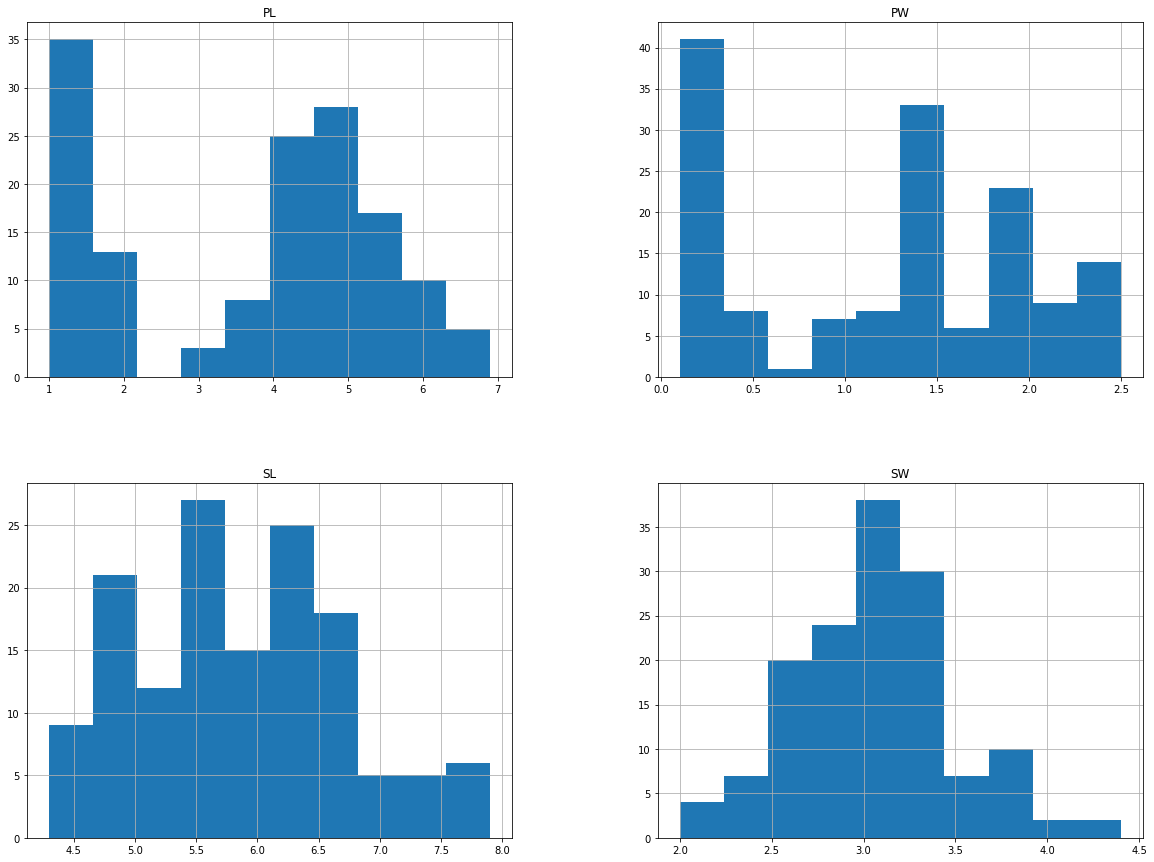

In [9]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
for col in ['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outliers Handling

In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

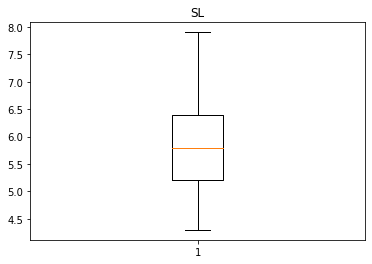

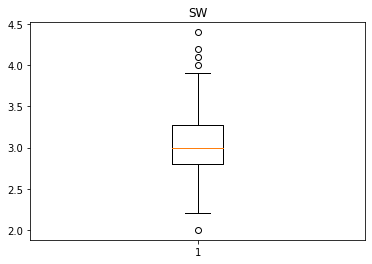

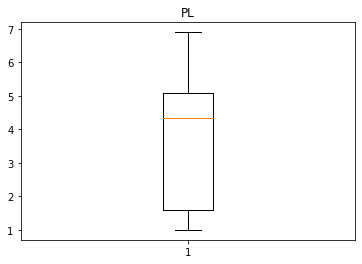

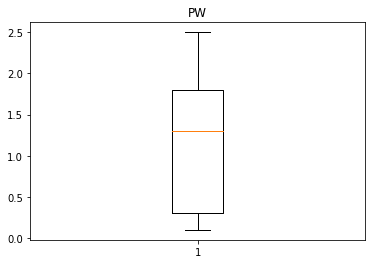

In [14]:
num_cols = ['SL', 'SW', 'PL', 'PW']

for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [15]:
# Handlind outliers

Q1 = np.percentile(data['SW'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75,interpolation = 'midpoint')

print("Q1 is ", Q1)
print("Q2 is ", Q2)
print("Q3 is ", Q3)

# finding IQR value

IQR = Q3-Q1
print("The IQR is",IQR)

# find the upper limit and lower limit

up_lim = Q3+1.5*IQR
lw_lim = Q1-1.5*IQR

print("The upper limit is ",up_lim)
print("The lower limit is", lw_lim)

# finding outliers

outliers = []
for x in data['SW']:
    if(x>up_lim) or (x<lw_lim):
        outliers.append(x)
        
outliers

Q1 is  2.8
Q2 is  3.0
Q3 is  3.25
The IQR is 0.4500000000000002
The upper limit is  3.9250000000000003
The lower limit is 2.1249999999999996


[4.0, 4.4, 4.1, 4.2, 2.0]

In [16]:
ind1 = data['SW']<lw_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [17]:
ind2 = data['SW']>up_lim
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [18]:
#Droping the outliers

data.drop([60,14, 15, 32, 33],inplace = True)

In [19]:
data.shape

(145, 5)

# Encode the categorical variables

In [20]:
#Importing labelencorder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [21]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [22]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [36]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [40]:
data['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

In [23]:
X = data.drop('Classification', axis =1)
y = data['Classification']

In [24]:
#import train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Logistic Regression

In [25]:
# Import logstic regression

from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_lr = logit_model.predict(X_test)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
# import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr,average='micro'))
print('Recall = ',recall_score(y_test,y_pred_lr, average='micro'))
print('f1 score =',f1_score(y_test,y_pred_lr,average='micro'))

Accuracy =  0.9655172413793104
precision =  0.9655172413793104
Recall =  0.9655172413793104
f1 score = 0.9655172413793104


In [27]:
confusion_matrix(y_test,y_pred_lr)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [28]:
y_pred_lr

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

In [29]:
y_test

74     1
145    2
29     0
21     0
46     0
122    2
131    2
113    2
89     1
20     0
12     0
59     1
133    2
83     1
78     1
40     0
117    2
138    2
105    2
106    2
99     1
141    2
11     0
71     1
35     0
49     0
55     1
81     1
116    2
Name: Classification, dtype: int32

# K NN

In [30]:
# import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
metric =[]
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

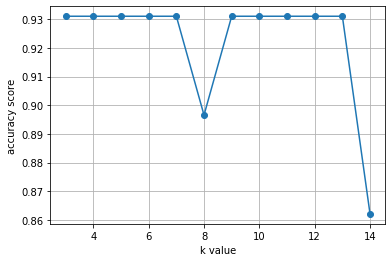

In [41]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,pos_label='positive',average='micro'))
print('Recall = ',recall_score(y_test,y_pred_knn,pos_label='positive',average='micro'))
print('f1 score =',f1_score(y_test,y_pred_knn,pos_label='positive',average='micro'))

Accuracy =  0.9310344827586207
precision =  0.9310344827586207
Recall =  0.9310344827586207
f1 score = 0.9310344827586207


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [44]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

 Here there is no incorrect prediction in logistic regression.that is seen in confusion matrix.Hence logistic regression is the best for this dataset